## Import libraries

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## import dataset

In [172]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    float64
 3   Name         888 non-null    object 
 4   Sex          888 non-null    int64  
 5   Age          715 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        887 non-null    float64
 8   Ticket       887 non-null    object 
 9   Fare         886 non-null    float64
 10  Embarked     886 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 76.4+ KB


In [173]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
883,888,1,1.0,"Graham, Miss. Margaret Edith",2,19.0,0,0.0,112053,30.00,1.0
884,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2.0,W./C. 6607,23.45,1.0
885,890,1,1.0,"Behr, Mr. Karl Howell",1,26.0,0,0.0,111369,30.00,2.0
886,891,0,3.0,"Dooley, Mr. Patrick",1,32.0,0,0.0,370376,7.75,3.0
887,1000,1,1.0,Mr. Frederick Maxfield Hoyt,1,38.0,1,0.0,19943,90.00,1.0


The unnecessary columns will be dropped.

In [174]:
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

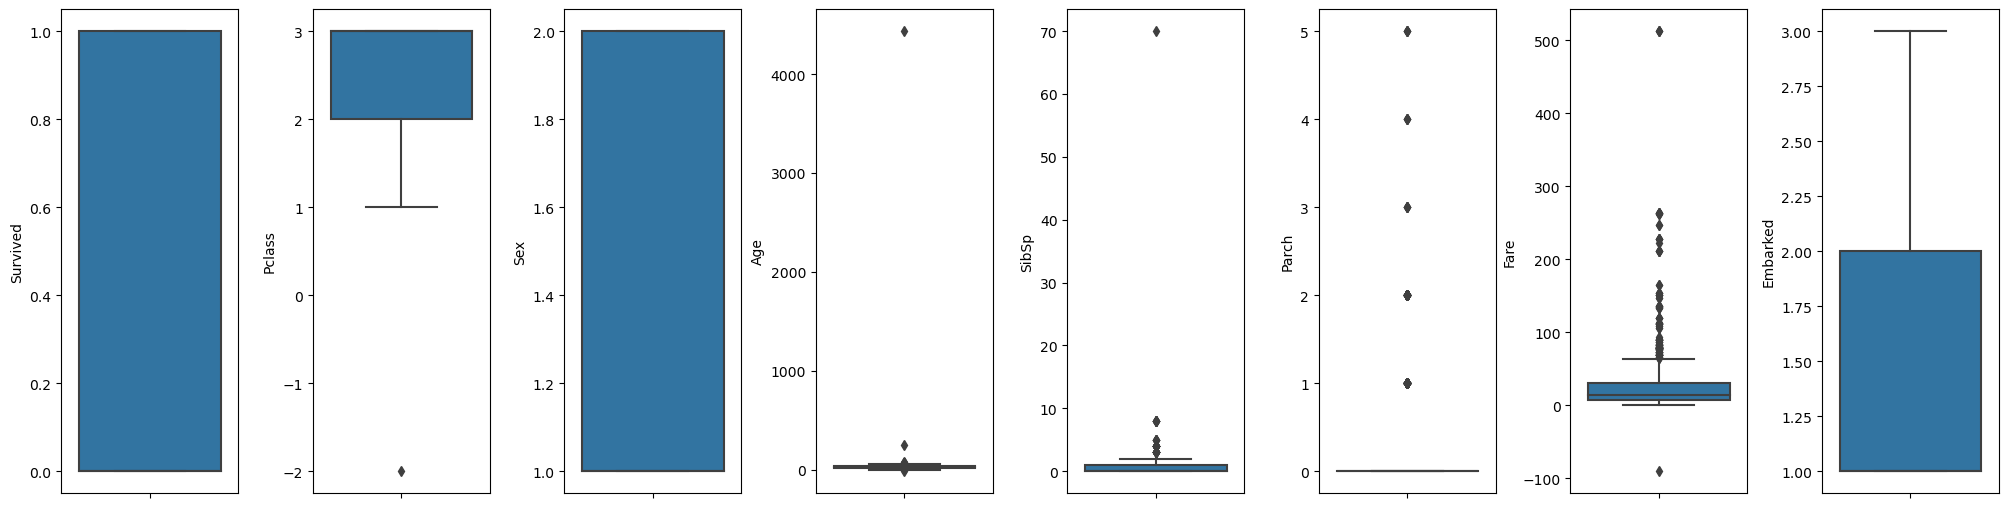

In [175]:
fig, axs = plt.subplots(ncols=8, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df_titanic.items():
    sns.boxplot(y=k, data=df_titanic, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Outliers

In [176]:
for k, v in df_titanic.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IQR = Q3 - Q1
    v_col = v[(v <= Q1 - 1.5 * IQR) | (v >= Q3 + 1.5 * IQR)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_titanic)[0]
    print(f"Column {k} has {perc:.2f}% outliers based on IQR")

Column Survived has 0.00% outliers based on IQR
Column Pclass has 0.11% outliers based on IQR
Column Sex has 0.00% outliers based on IQR
Column Age has 1.58% outliers based on IQR
Column SibSp has 5.29% outliers based on IQR
Column Parch has 99.89% outliers based on IQR
Column Fare has 13.29% outliers based on IQR
Column Embarked has 0.00% outliers based on IQR


In [177]:
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.00000,888.000000,715.000000,888.000000,887.000000,886.000000,886.000000
mean,0.382883,2.30518,1.351351,36.006993,0.602477,0.370913,32.024786,1.363431
std,0.486364,0.84697,0.477662,165.601302,2.579661,0.769751,49.947084,0.636884
min,0.000000,-2.00000,1.000000,-12.000000,0.000000,0.000000,-90.000000,1.000000
25%,0.000000,2.00000,1.000000,20.000000,0.000000,0.000000,7.900000,1.000000
50%,0.000000,3.00000,1.000000,28.000000,0.000000,0.000000,14.450000,1.000000
75%,1.000000,3.00000,2.000000,38.000000,1.000000,0.000000,30.700000,2.000000
max,1.000000,3.00000,2.000000,4435.000000,70.000000,5.000000,512.330000,3.000000


We will handle the outlier of those six columns above.

### Survived

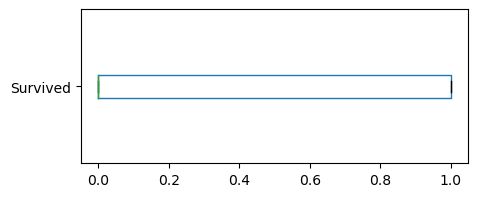

In [178]:
df_titanic.boxplot(column=['Survived'],fontsize=10,rot=0,grid=False,figsize=(5,2), vert=False)
plt.show()

In [179]:
Q1 = df_titanic['Survived'].quantile(0.25)
Q3 = df_titanic['Survived'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1=',Q1, 'Q3=',Q3, 'IQR=',IQR, 'Min=',LB, 'Max=',UB)

Q1= 0.0 Q3= 1.0 IQR= 1.0 Min= -1.5 Max= 2.5


In [180]:
df_titanic[(df_titanic['Survived'] < LB) | (df_titanic['Survived'] > UB)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


#### there is no outliers detected in Survived column 

In [181]:
df_titanic['Survived'].unique()

array([0, 1])

### Pclass

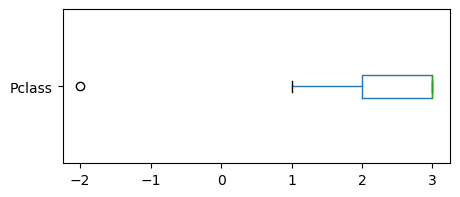

In [182]:
df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [183]:
Q1 = df_titanic['Pclass'].quantile(0.25)
Q3 = df_titanic['Pclass'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1=',Q1, 'Q3=',Q3, 'IQR=',IQR, 'Min=',LB, 'Max=',UB)

Q1= 2.0 Q3= 3.0 IQR= 1.0 Min= 0.5 Max= 4.5


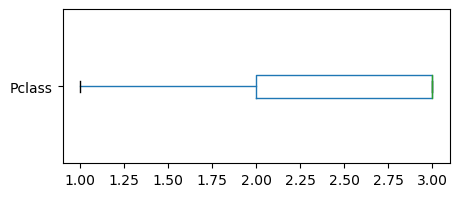

In [184]:
df_titanic['Pclass'][(df_titanic['Pclass'] < LB) | (df_titanic['Pclass'] > UB)] = np.median(df_titanic['Pclass'])

df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Age

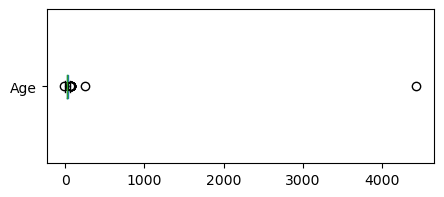

In [185]:
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [186]:
Q1 = df_titanic['Age'].quantile(0.25)
Q3 = df_titanic['Age'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1=',Q1, 'Q3=',Q3, 'IQR=',IQR, 'Min=',LB, 'Max=',UB)

Q1= 20.0 Q3= 38.0 IQR= 18.0 Min= -7.0 Max= 65.0


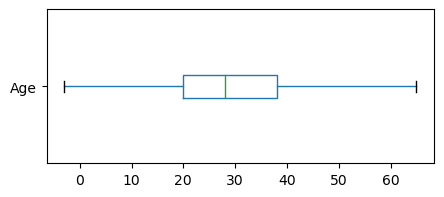

In [187]:
df_titanic['Age'][(df_titanic['Age'] < LB) | (df_titanic['Age'] > UB)] = np.median(df_titanic['Age'])

df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### SibSp

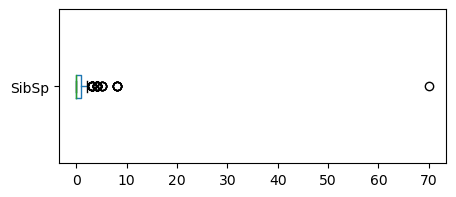

In [188]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [189]:
Q1 = df_titanic['SibSp'].quantile(0.25)
Q3 = df_titanic['SibSp'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1=',Q1, 'Q3=',Q3, 'IQR=',IQR, 'Min=',LB, 'Max=',UB)

Q1= 0.0 Q3= 1.0 IQR= 1.0 Min= -1.5 Max= 2.5


In [190]:
df_titanic['SibSp'][(df_titanic['SibSp'] < LB) | (df_titanic['SibSp'] > UB)] = np.median(df_titanic['SibSp'])


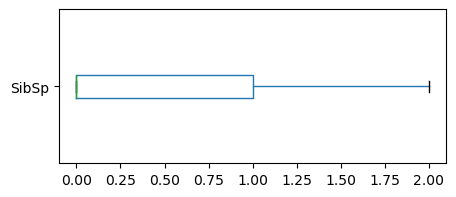

In [191]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Parch

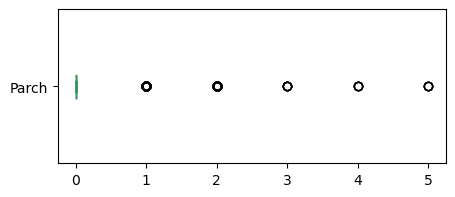

In [194]:
df_titanic.boxplot(column=['Parch'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [195]:
Q1 = df_titanic['Parch'].quantile(0.25)
Q3 = df_titanic['Parch'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1=',Q1, 'Q3=',Q3, 'IQR=',IQR, 'Min=',LB, 'Max=',UB)

Q1= 0.0 Q3= 0.0 IQR= 0.0 Min= 0.0 Max= 0.0


In [196]:
df_titanic['Parch'][(df_titanic['Parch'] < LB) | (df_titanic['Parch'] > UB)] = np.median(df_titanic['Parch'])

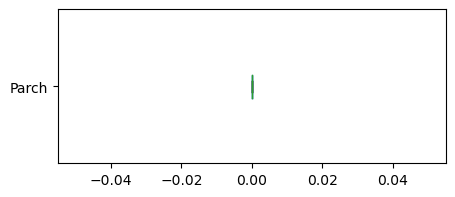

In [197]:
df_titanic.boxplot(column=['Parch'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Fare

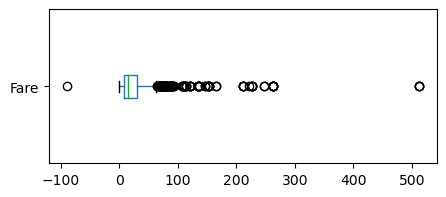

In [198]:
df_titanic.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,2), vert=False)
plt.show()

In [199]:
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1=',Q1, 'Q3=',Q3, 'IQR=',IQR, 'Min=',LB, 'Max=',UB)

Q1= 7.9 Q3= 30.7 IQR= 22.799999999999997 Min= -26.299999999999997 Max= 64.89999999999999


In [200]:
df_titanic['Fare'][(df_titanic['Fare'] < LB) | (df_titanic['Fare'] > UB)] = np.median(df_titanic['Fare'])


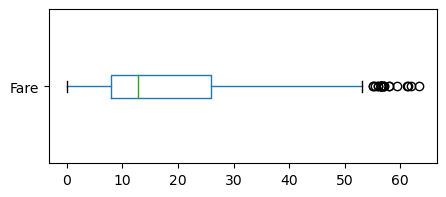

In [201]:
df_titanic.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [202]:
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,704.000000,888.000000,676.0,768.000000,886.000000
mean,0.382883,2.310811,1.351351,29.119318,0.297297,0.0,17.637539,1.363431
std,0.486364,0.834850,0.477662,13.998475,0.521806,0.0,13.353302,0.636884
min,0.000000,1.000000,1.000000,-3.000000,0.000000,0.0,0.000000,1.000000
25%,0.000000,2.000000,1.000000,20.000000,0.000000,0.0,7.900000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.0,12.765000,1.000000
75%,1.000000,3.000000,2.000000,38.000000,1.000000,0.0,26.000000,2.000000
max,1.000000,3.000000,2.000000,65.000000,2.000000,0.0,63.360000,3.000000


In [203]:
# saving the dataframe
df_titanic.to_csv('titanic2_iqr_median.csv', index=False)